In [1]:
%load_ext autoreload
%autoreload
from IPython.core.debugger import Tracer

from keras.layers import Input, Add, Conv2D
import numpy as np
from keras.models import Model
from keras.optimizers import Adam
from fabrics import UpSample, DownSample, SameRes, Fabric, Node
from keras import backend as K
from keras.utils import plot_model

from helpers import plot_model_history
from IPython.display import clear_output
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Using TensorFlow backend.


In [58]:
def img_func(img):
    std = 71.802
    mean = 96.84
    img -= mean
    img /= std
    
    return img

def img_mask_func(img):
    img /= 255
    return img

seed = 1

image_datagen = ImageDataGenerator(
        preprocessing_function=img_func,
        horizontal_flip = True,
        fill_mode = "constant",
        cval=0)

mask_datagen = ImageDataGenerator(
        preprocessing_function=img_mask_func,
        horizontal_flip = True,
        fill_mode = "constant",
        cval=0)

image_generator = image_datagen.flow_from_directory(
    'data/parts_train/',
    target_size=(256, 256),
    class_mode=None,
    batch_size=100,
    seed=seed)

mask_generator = mask_datagen.flow_from_directory(
    'data/parts_train_labels/',
    target_size=(256, 256),
    class_mode=None,
    color_mode='rgb',
    batch_size=100,
    seed=seed)

train_generator = zip(image_generator, mask_generator)

Found 1500 images belonging to 1 classes.
Found 1500 images belonging to 1 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [61]:
#x = np.load('data/parts_train.npy')
#y = np.load('data/parts_train_labels.npy')

#x_val = np.load('data/parts_validation.npy')
#y_val = np.load('data/parts_validation_labels.npy')

fabric = Fabric((256,256,3), (2, 9), 4, channels_double=False)

print("Plotting model")
#plot_model(fabric.model, to_file='images/2x9.png')
print("-"*30)

Plotting model
------------------------------


In [62]:
print('-'*30)
print('Fitting model...')
print('-'*30)
history = fabric.model.fit_generator(
                           train_generator,
                           steps_per_epoch=30,
                           epochs=60, 
                           verbose=1,
                           #validation_data=validation_generator,
                           #validation_steps=800
                           shuffle=True)


------------------------------
Fitting model...
------------------------------
Epoch 1/60
30/30 [==============================] - 85s - loss: 1.1756 - acc: 0.5628    
Epoch 2/60
30/30 [==============================] - 67s - loss: 1.1712 - acc: 0.5639    
Epoch 3/60
30/30 [==============================] - 65s - loss: 1.1688 - acc: 0.5649    
Epoch 4/60
30/30 [==============================] - 62s - loss: 1.1654 - acc: 0.5656    
Epoch 5/60
30/30 [==============================] - 54s - loss: 1.1618 - acc: 0.5667    
Epoch 6/60
30/30 [==============================] - 65s - loss: 1.1588 - acc: 0.5676    
Epoch 7/60
30/30 [==============================] - 66s - loss: 1.1563 - acc: 0.5681    
Epoch 8/60
30/30 [==============================] - 65s - loss: 1.1524 - acc: 0.5691    
Epoch 9/60
30/30 [==============================] - 70s - loss: 1.1494 - acc: 0.5703    
Epoch 10/60
30/30 [==============================] - 89s - loss: 1.1464 - acc: 0.5706    
Epoch 11/60
30/30 [===========

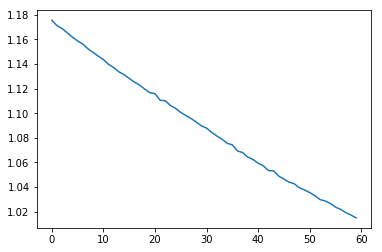

In [70]:
plt.plot(history.history['loss'])
plt.show()

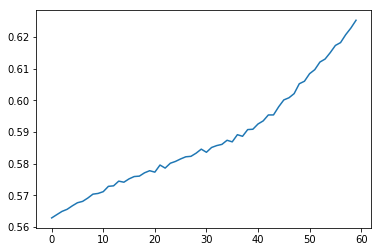

In [71]:
plt.plot(history.history['acc'])
plt.show()

In [72]:
image_datagen_v = ImageDataGenerator(
        preprocessing_function=img_func,
        horizontal_flip = True,
        fill_mode = "constant",
        cval=0)

mask_datagen_v = ImageDataGenerator(
        preprocessing_function=img_mask_func,
        horizontal_flip = True,
        fill_mode = "constant",
        cval=0)

image_generator_v = image_datagen_v.flow_from_directory(
    'data/parts_validation/',
    batch_size=100,
    target_size=(256, 256),
    class_mode=None)

mask_generator_v = mask_datagen_v.flow_from_directory(
    'data/parts_validation_labels/',
    batch_size=100,
    target_size=(256, 256),
    class_mode=None)

v_generator = zip(image_generator_v, mask_generator_v)

Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


In [76]:
history2 = fabric.model.fit_generator(
                           train_generator,
                           steps_per_epoch=30,
                           epochs=1, 
                           verbose=1,
                           validation_data=v_generator,
                           validation_steps=10,
                           shuffle=True)

Epoch 1/1
30/30 [==============================] - 132s - loss: 1.0126 - acc: 0.6270 - val_loss: 0.9895 - val_acc: 0.6345


In [78]:
history3 = fabric.model.fit_generator(
                           train_generator,
                           steps_per_epoch=30,
                           epochs=20, 
                           verbose=1,
                           validation_data=v_generator,
                           validation_steps=10,
                           shuffle=True)

Epoch 1/20
30/30 [==============================] - 103s - loss: 1.0129 - acc: 0.6275 - val_loss: 0.9866 - val_acc: 0.6365
Epoch 2/20
30/30 [==============================] - 77s - loss: 1.0078 - acc: 0.6321 - val_loss: 0.9817 - val_acc: 0.6405
Epoch 3/20
30/30 [==============================] - 75s - loss: 1.0059 - acc: 0.6336 - val_loss: 0.9796 - val_acc: 0.6435
Epoch 4/20
30/30 [==============================] - 76s - loss: 1.0046 - acc: 0.6353 - val_loss: 0.9829 - val_acc: 0.6420
Epoch 5/20
30/30 [==============================] - 78s - loss: 1.0020 - acc: 0.6388 - val_loss: 0.9768 - val_acc: 0.6462
Epoch 6/20
30/30 [==============================] - 76s - loss: 0.9995 - acc: 0.6404 - val_loss: 0.9744 - val_acc: 0.6490
Epoch 7/20
30/30 [==============================] - 79s - loss: 0.9989 - acc: 0.6421 - val_loss: 0.9766 - val_acc: 0.6478
Epoch 8/20
30/30 [==============================] - 79s - loss: 0.9950 - acc: 0.6458 - val_loss: 0.9701 - val_acc: 0.6528
Epoch 9/20
30/30 [=====

In [80]:
history4 = fabric.model.fit_generator(
                           train_generator,
                           steps_per_epoch=30,
                           epochs=20, 
                           verbose=1,
                           validation_data=v_generator,
                           validation_steps=10,
                           shuffle=True)

Epoch 1/20
30/30 [==============================] - 102s - loss: 0.9755 - acc: 0.6708 - val_loss: 0.9573 - val_acc: 0.6748
Epoch 2/20
30/30 [==============================] - 78s - loss: 0.9731 - acc: 0.6718 - val_loss: 0.9508 - val_acc: 0.6769
Epoch 3/20
30/30 [==============================] - 75s - loss: 0.9711 - acc: 0.6753 - val_loss: 0.9553 - val_acc: 0.6778
Epoch 4/20
30/30 [==============================] - 78s - loss: 0.9737 - acc: 0.6731 - val_loss: 0.9515 - val_acc: 0.6816
Epoch 5/20
30/30 [==============================] - 78s - loss: 0.9678 - acc: 0.6783 - val_loss: 0.9505 - val_acc: 0.6806
Epoch 6/20
30/30 [==============================] - 76s - loss: 0.9667 - acc: 0.6785 - val_loss: 0.9504 - val_acc: 0.6794
Epoch 7/20
30/30 [==============================] - 73s - loss: 0.9680 - acc: 0.6784 - val_loss: 0.9456 - val_acc: 0.6838
Epoch 8/20
30/30 [==============================] - 71s - loss: 0.9687 - acc: 0.6790 - val_loss: 0.9498 - val_acc: 0.6824
Epoch 9/20
30/30 [=====

In [81]:
fabric.model.save('data/2x9.h5')

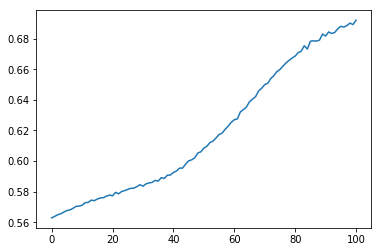

In [90]:
plt.plot(np.concatenate([history.history['acc'], history2.history['acc'], history3.history['acc'], history4.history['acc']]))
plt.show()

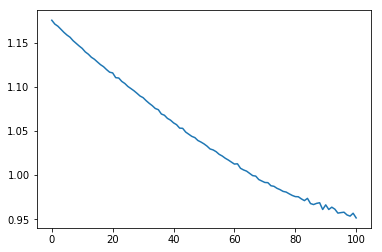

In [91]:
plt.plot(np.concatenate([history.history['loss'], history2.history['loss'], history3.history['loss'], history4.history['loss']]))
plt.show()